In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:\\PROJECTS\\archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

D:\PROJECTS\archive\TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav
D:\PROJECTS\archive\TESS Toronto emotional speech set data\OAF_angry\OAF_bar_angry.wav
D:\PROJECTS\archive\TESS Toronto emotional speech set data\OAF_angry\OAF_base_angry.wav
D:\PROJECTS\archive\TESS Toronto emotional speech set data\OAF_angry\OAF_bath_angry.wav
D:\PROJECTS\archive\TESS Toronto emotional speech set data\OAF_angry\OAF_bean_angry.wav
D:\PROJECTS\archive\TESS Toronto emotional speech set data\OAF_angry\OAF_beg_angry.wav
D:\PROJECTS\archive\TESS Toronto emotional speech set data\OAF_angry\OAF_bite_angry.wav
D:\PROJECTS\archive\TESS Toronto emotional speech set data\OAF_angry\OAF_boat_angry.wav
D:\PROJECTS\archive\TESS Toronto emotional speech set data\OAF_angry\OAF_bone_angry.wav
D:\PROJECTS\archive\TESS Toronto emotional speech set data\OAF_angry\OAF_book_angry.wav
D:\PROJECTS\archive\TESS Toronto emotional speech set data\OAF_angry\OAF_bought_angry.wav
D:\PROJECTS\archive\TESS Toronto

## Import Modules


In [108]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

import torchaudio
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import Wav2Vec2Model, Wav2Vec2Processor, Trainer, TrainingArguments, Wav2Vec2ForSequenceClassification

import warnings
warnings.filterwarnings('ignore')

## Load the dataset


In [109]:
paths = []
labels = []
for dirname, _, filenames in os.walk('D:\\PROJECTS\\archive'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]  #getting only file name 
        label = label.split('.')[0] #splitting file name from its extension
        labels.append(label.lower())#converting filename into lowercase
    if len(paths) == 2800:
        break
print("Dataset is Loaded")

Dataset is Loaded


In [110]:
len(paths)

2800

In [111]:
paths[:5]

['D:\\PROJECTS\\archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'D:\\PROJECTS\\archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'D:\\PROJECTS\\archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'D:\\PROJECTS\\archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'D:\\PROJECTS\\archive\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [112]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [113]:
##create a database
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,D:\PROJECTS\archive\TESS Toronto emotional spe...,angry
1,D:\PROJECTS\archive\TESS Toronto emotional spe...,angry
2,D:\PROJECTS\archive\TESS Toronto emotional spe...,angry
3,D:\PROJECTS\archive\TESS Toronto emotional spe...,angry
4,D:\PROJECTS\archive\TESS Toronto emotional spe...,angry


In [114]:
df['label'].value_counts()   ##display the number of labels

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

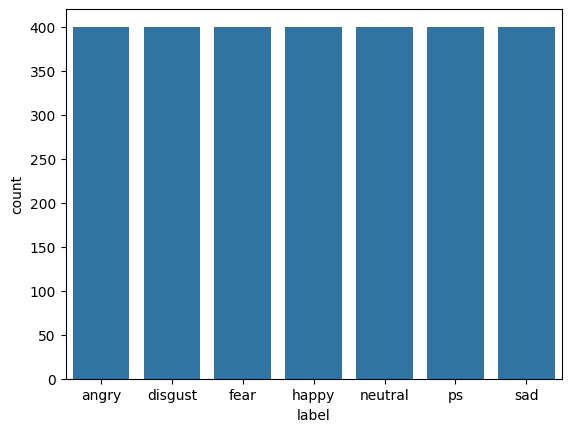

In [115]:
sns.countplot(x='label', data=df)

In [116]:
def waveplot(data, sr, emotion):
    plt.figure(figsize = (10,4))
    plt.title(emotion, size = 20)
    librosa.display.waveshow(data, sr = sampling_rate)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (10.5,4))
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()
    

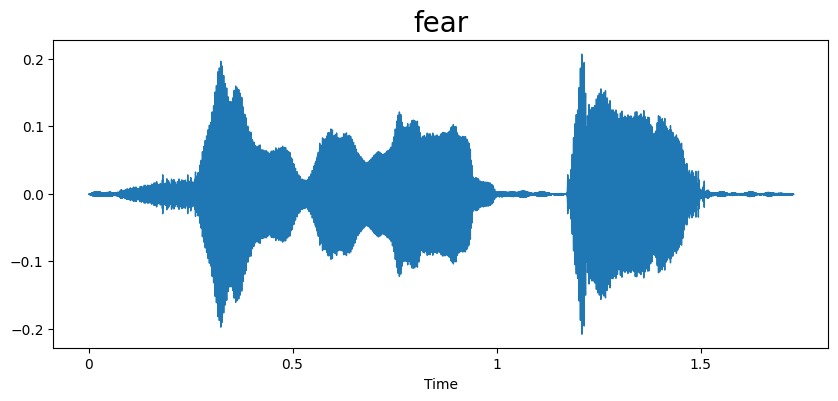

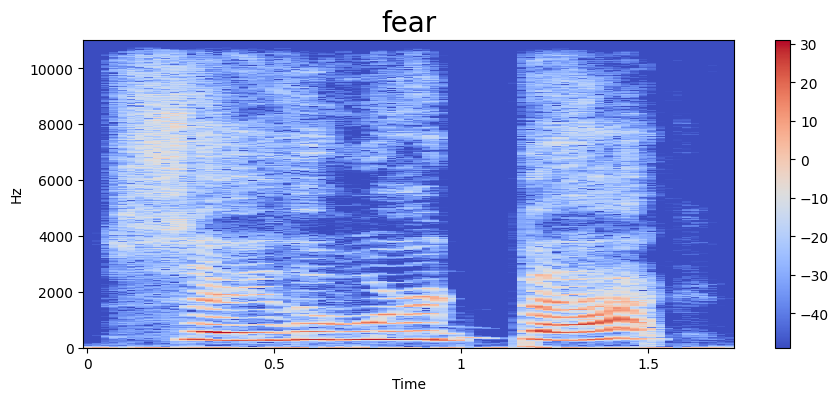

In [117]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]   ##here, 4 is the audio of 4th index, you can also change it 
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

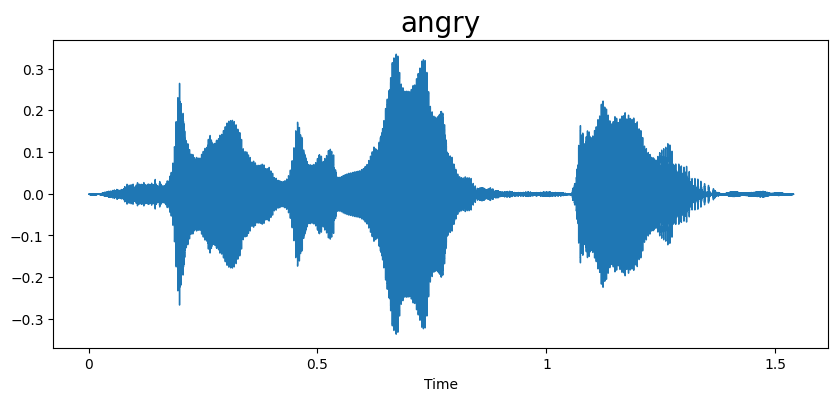

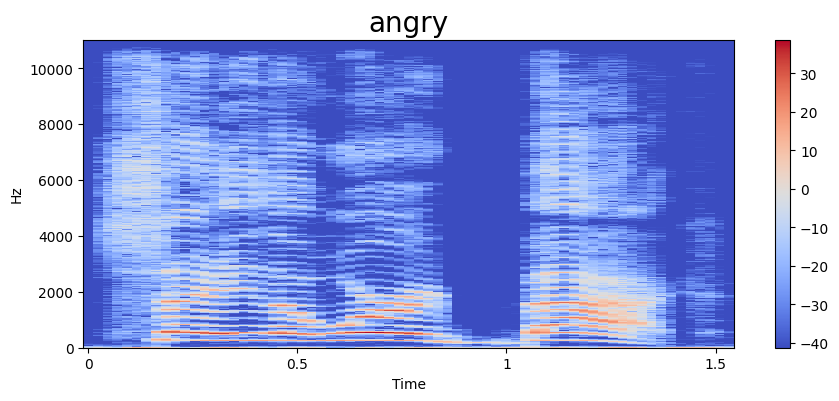

In [118]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[0]   ##here, 0 is the audio of 0th index, you can also change it 
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

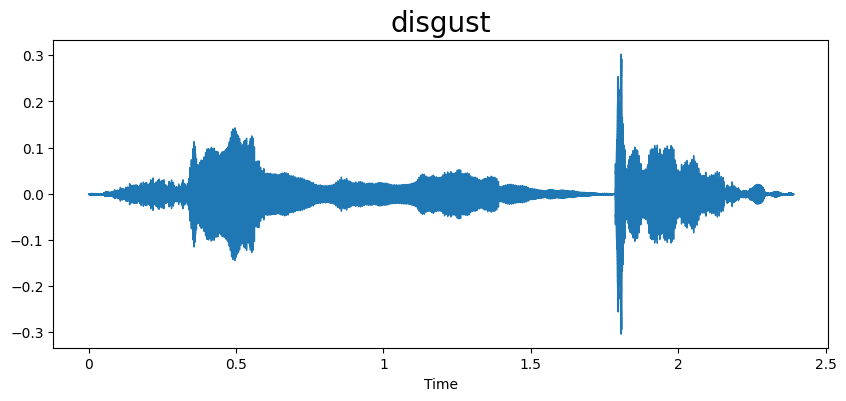

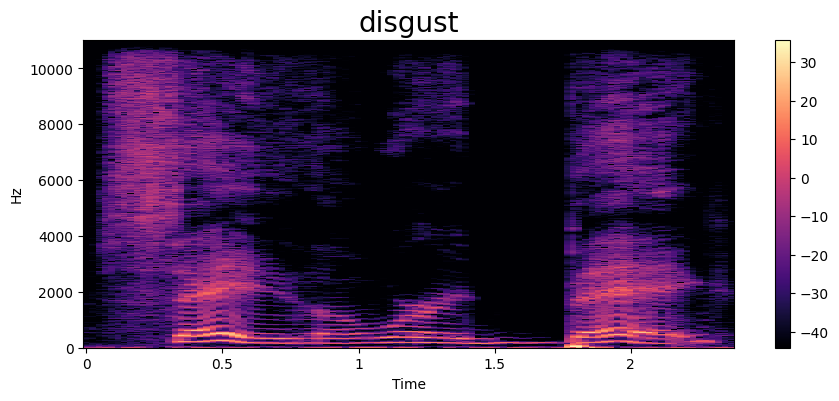

In [119]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[5]   ##here, 0 is the audio of 0th index, you can also change it 
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

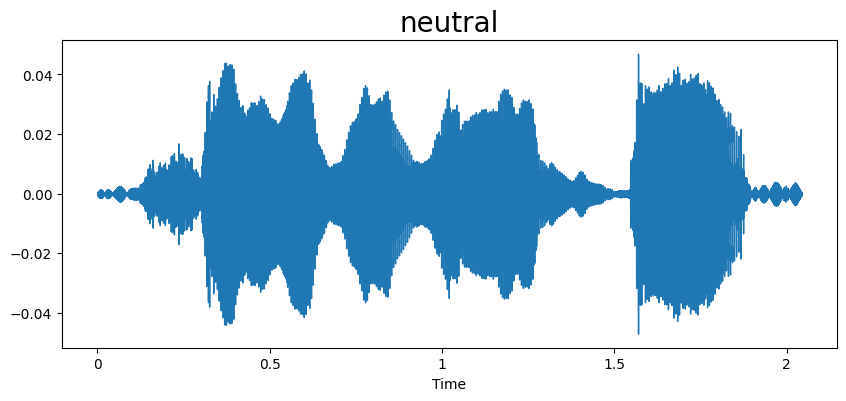

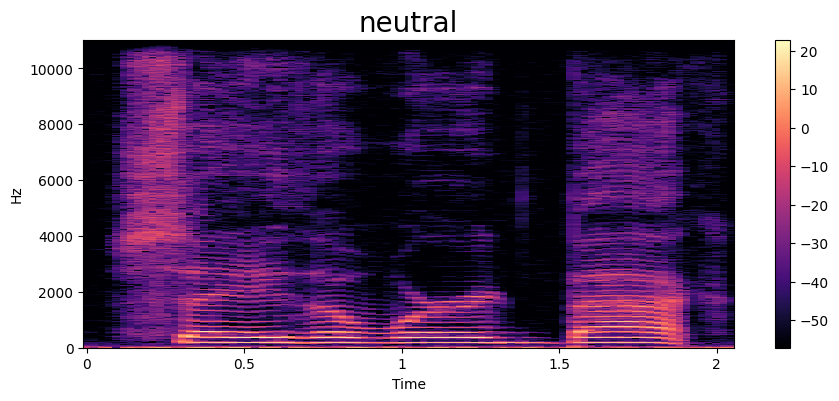

In [120]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]   ##here, 0 is the audio of 0th index, you can also change it 
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

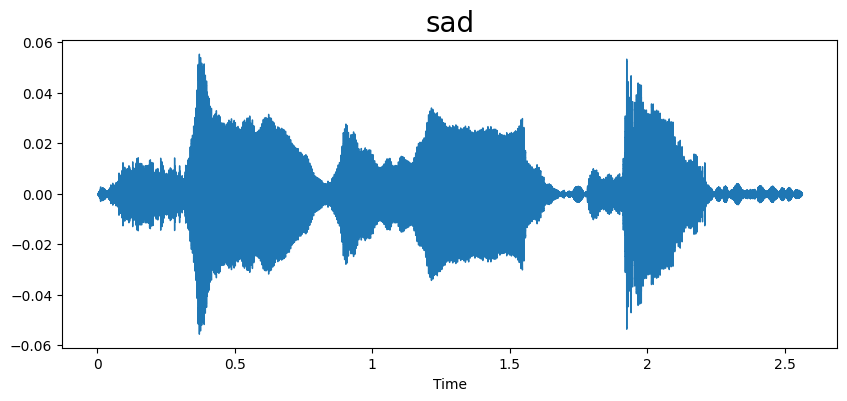

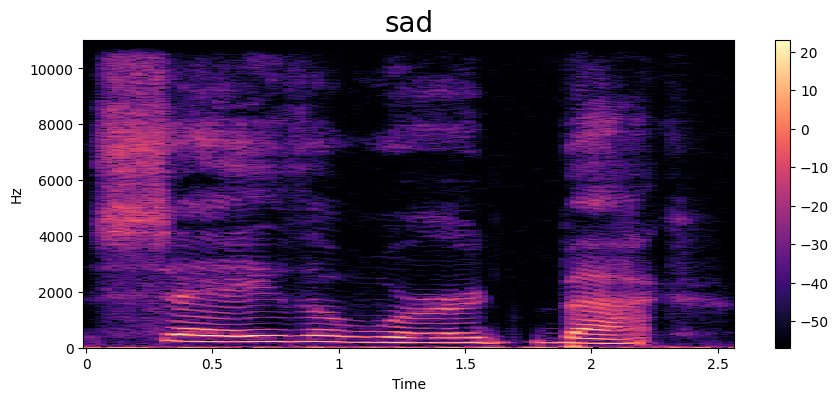

In [121]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]   ##here, 0 is the audio of 0th index, you can also change it 
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

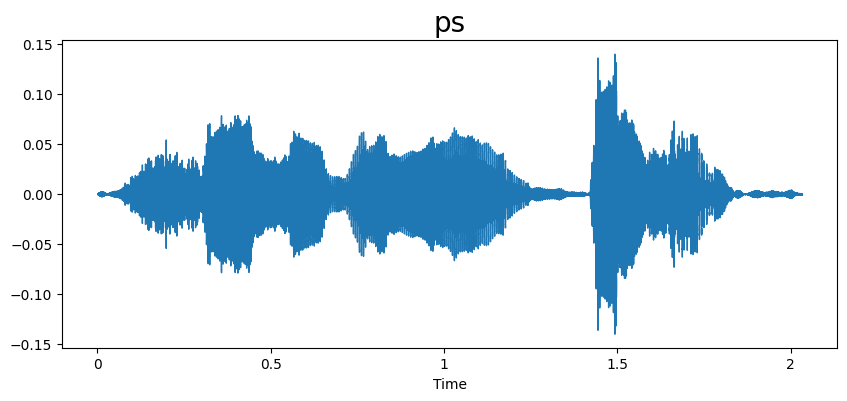

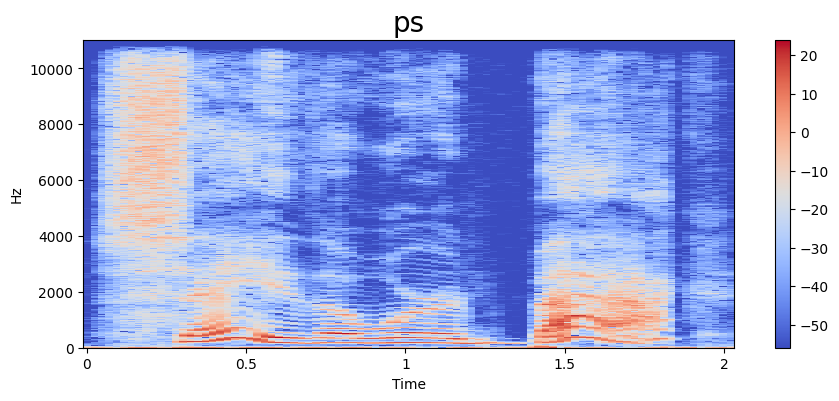

In [122]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]   ##here, 0 is the audio of 0th index, you can also change it 
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

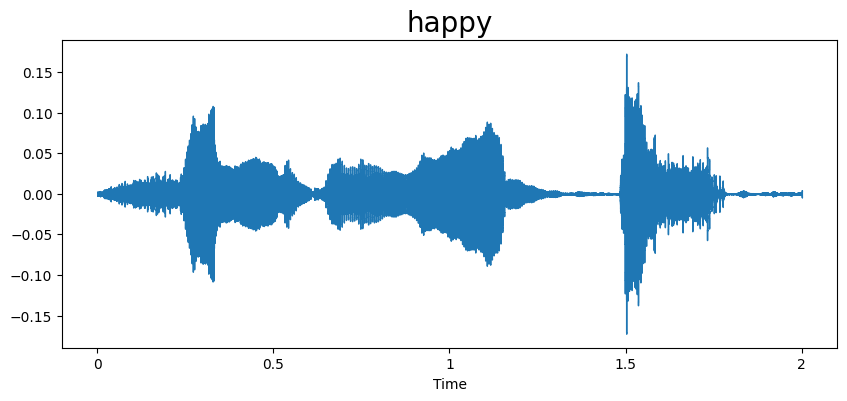

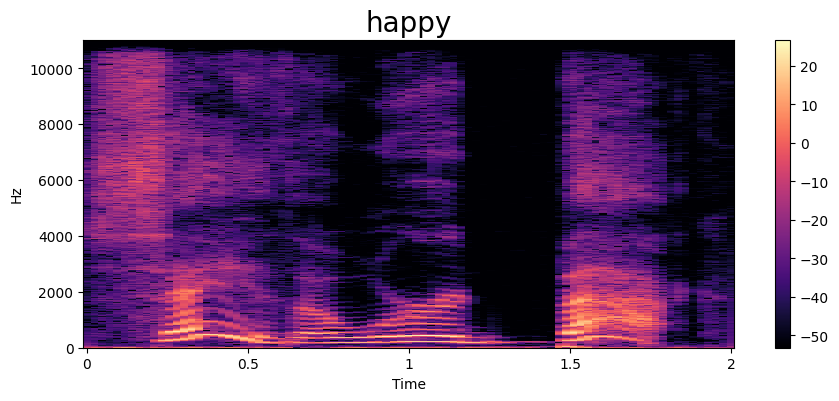

In [123]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]   ##here, 0 is the audio of 0th index, you can also change it 
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Create Custom Dataset Class

In [124]:
# Assuming df['label'] contains the actual emotion names
label_map = {label: idx for idx, label in enumerate(df['label'].unique())}
inverse_label_map = {idx: label for label, idx in label_map.items()}
df['label'] = df['label'].map(label_map)  # Map the emotion names to integers
df.head(4)



,speech,label
0,D:\PROJECTS\archive\TESS Toronto emotional spe...,0
1,D:\PROJECTS\archive\TESS Toronto emotional spe...,0
2,D:\PROJECTS\archive\TESS Toronto emotional spe...,0
3,D:\PROJECTS\archive\TESS Toronto emotional spe...,0


In [125]:
#emotion = 'ps'
#path = np.array(df['speech'][df['label'] == 2])[0]   ##here, 0 is the audio of 0th index, you can also change it 
#data, sampling_rate = librosa.load(path)
#len(data)
#sampling_rate * 2

In [126]:
class SpeechEmotionDataset(Dataset):
    def __init__ (self, df, processor, max_length=32000):
        self.df =df
        self.processor = processor
        self.max_length = max_length
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        audio_path = self.df.iloc[idx]['speech']
        label = self.df.iloc[idx]['label']
        
        #load the audio file
        speech, sr = librosa.load(audio_path, sr = 16000)
        
        #pad or truncate the speech to the required length
        if len(speech) > self.max_length:
            speech = speech[:self.max_length]
        else:
            speech = np.pad(speech, (0, self.max_length - len(speech)), 'constant')
            
        # Pre-process Audio file
        inputs = self.processor(speech, sampling_rate = 16000, return_tensors = 'pt', padding = True, truncate = True, max_length = self.max_length)
        
        input_values = inputs.input_values.squeeze()
        return {'input_values': input_values, 'labels': torch.tensor(label, dtype = torch.long)}

In [127]:
# Split the data for train and test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42)

In [128]:
# initialize the processor and model
processor = Wav2Vec2Processor.from_pretrained('facebook/wav2vec2-base')
model = Wav2Vec2ForSequenceClassification.from_pretrained('facebook/wav2vec2-base', num_labels = 7)

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [129]:
#Load the dataset
train_dataset = SpeechEmotionDataset(train_df, processor)
test_dataset = SpeechEmotionDataset(test_df, processor)

In [130]:
train_dataset[0]['input_values'].size()

torch.Size([32000])

## Set Training Arguments

In [131]:
training_args = TrainingArguments(
    output_dir = './results',
    eval_strategy = 'epoch',
    save_strategy = 'epoch',
    learning_rate = 2e-5,
    per_device_train_batch_size = 16,
    num_train_epochs = 3,
    weight_decay = 0.01,
    report_to=[]
)

In [132]:
# Create function for computing metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis = 1)  #model predicted labels
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    return{
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

In [133]:
# Initialize the trainer
trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset= train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)
trainer.train()

 33%|███▎      | 140/420 [15:32<32:49,  7.03s/it]






































































                                    

                                                 
 33%|███▎      | 140/420 [16:26<32:49,  7.03s/it]


{'eval_loss': 0.6957933306694031, 'eval_accuracy': 0.9607142857142857, 'eval_precision': 0.9660771631239738, 'eval_recall': 0.9607142857142857, 'eval_f1': 0.9605583970240673, 'eval_runtime': 53.7705, 'eval_samples_per_second': 10.415, 'eval_steps_per_second': 1.302, 'epoch': 1.0}


 67%|██████▋   | 280/420 [32:33<16:04,  6.89s/it]  






































































                                    

                                                 
 67%|██████▋   | 280/420 [33:28<16:04,  6.89s/it]


{'eval_loss': 0.272689551115036, 'eval_accuracy': 0.9964285714285714, 'eval_precision': 0.9965238095238095, 'eval_recall': 0.9964285714285714, 'eval_f1': 0.996429511608083, 'eval_runtime': 54.1709, 'eval_samples_per_second': 10.338, 'eval_steps_per_second': 1.292, 'epoch': 2.0}


100%|██████████| 420/420 [57:12<00:00, 12.63s/it]






































































                                    

                                                 
100%|██████████| 420/420 [58:58<00:00, 12.63s/it]


{'eval_loss': 0.19182248413562775, 'eval_accuracy': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_f1': 1.0, 'eval_runtime': 102.9935, 'eval_samples_per_second': 5.437, 'eval_steps_per_second': 0.68, 'epoch': 3.0}



100%|██████████| 420/420 [59:00<00:00,  8.43s/it]

{'train_runtime': 3540.2274, 'train_samples_per_second': 1.898, 'train_steps_per_second': 0.119, 'train_loss': 0.6726064772832961, 'epoch': 3.0}


TrainOutput(global_step=420, training_loss=0.6726064772832961, metrics={'train_runtime': 3540.2274, 'train_samples_per_second': 1.898, 'train_steps_per_second': 0.119, 'total_flos': 1.2201848064e+17, 'train_loss': 0.6726064772832961, 'epoch': 3.0})

In [134]:
results = trainer.evaluate()
print(results)

100%|██████████| 70/70 [01:41<00:00,  1.44s/it]

{'eval_loss': 0.19182248413562775, 'eval_accuracy': 1.0, 'eval_precision': 1.0, 'eval_recall': 1.0, 'eval_f1': 1.0, 'eval_runtime': 102.5465, 'eval_samples_per_second': 5.461, 'eval_steps_per_second': 0.683, 'epoch': 3.0}


## Test Predictions

In [135]:
#Database test -> 1

import random
idx = random.randrange(0, len(test_dataset))
print("Original Label: ", inverse_label_map[int(test_dataset[idx]['labels'])])
# Prepare the input values
input_values = test_dataset[idx]['input_values'].unsqueeze(0).to('cpu')

# Perform inference
with torch.no_grad():
    outputs = model(input_values)

logits = outputs.logits
predicted_class = logits.argmax(dim=-1).item()

# Print the predicted class
print("Predicted Label: ", inverse_label_map[predicted_class])


Original Label:  happy
Predicted Label:  happy


In [136]:
#Database test -> 2

import random
idx = random.randrange(0, len(test_dataset))
print("Original Label: ", inverse_label_map[int(test_dataset[idx]['labels'])])
# Prepare the input values
input_values = test_dataset[idx]['input_values'].unsqueeze(0).to('cpu')

# Perform inference
with torch.no_grad():
    outputs = model(input_values)

logits = outputs.logits
predicted_class = logits.argmax(dim=-1).item()

# Print the predicted class
print("Predicted Label: ", inverse_label_map[predicted_class])


Original Label:  fear
Predicted Label:  fear
